In [1]:
import pandas as pd
import geopandas as gpd
from shapely import wkt

In [2]:
from requests import Request
from owslib.wfs import WebFeatureService
url = "https://geodata.nationaalgeoregister.nl/asbestscholenkaart/wfs"
wfs = WebFeatureService(url=url)
layer = list(wfs.contents)[-1]
params = dict(service='WFS', request='GetFeature',typeName="asbestscholenkaart:asbestscholenkaart",StartIndex='0', outputFormat='json')
q = Request('GET', url, params=params).prepare().url
data = gpd.read_file(q)
# data = gpd.read_file('data/asbestscholenkaart.csv')
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
linkdata = gpd.read_file('data/Woonplaatsen.csv')


In [4]:
#deze data linkt de dataset van gemeentegrenzen aan die van asbestscholenkaart
linkdata = linkdata[['Woonplaatsen','GemeenteNaam','ProvincieNaam']]
linkdata['plaatsnaam'] = linkdata['Woonplaatsen'].str.upper()

In [5]:
# link da data en voeg gemeente toe aan dataset
data = data.merge(linkdata, on='plaatsnaam')

In [6]:
data.nunique()

id                                  7810
brin_vest_                          7810
soort_instelling                       7
naam_vestiging                      6243
plaatsnaam                          1766
straatnaam                          5943
postcode                            7371
huisnummer                           424
huisnummer_toevoeging                 17
x_y_coordinaten                     7430
woonplaats                          1767
openbare_ruimte_naam                5943
postcode1                           7344
huisnummer1                          422
huisletter                            12
huisnummer_toevoeging1                 4
nummeraanduidingidentificatie       7806
adresseerbaarobjectidentificatie    7806
pand_identificatie                  7810
bouwjaar                             143
oppervlakteverblijfsobject          3504
woonfunctie                            1
sportfunctie                           1
gezondheidszorgfunctie                 1
logiesfunctie   

In [24]:
data = data[["soort_instelling","naam_vestiging","plaatsnaam","x_y_coordinaten",'Woonplaatsen','GemeenteNaam','ProvincieNaam']]

In [27]:
#omzetten data voor plot
#data['x_y_coordinaten'] = data['x_y_coordinaten'].apply(wkt.loads)
#data = data.set_geometry('x_y_coordinaten')
#data = data.to_crs(epsg=3857)
data.count()
# data = gpd.GeoDataFrame(data)
data.describe()

,soort_instelling,naam_vestiging,plaatsnaam,x_y_coordinaten,Woonplaatsen,GemeenteNaam,ProvincieNaam
count,7842,7842,7842,7842,7842,7842,7842
unique,7,6243,1766,7430,1766,373,12
top,BO,Basisschool De Regenboog,AMSTERDAM,POINT(0.0 0.0 0.0),Amsterdam,Rotterdam,Zuid-Holland
freq,6007,26,263,17,263,266,1475


In [34]:
g = 'Rotterdam'
# data['GemeenteNaam'] = data['GemeenteNaam'].astype('string')
gemdata = data.loc[data['GemeenteNaam'] == g]
gemdata

,soort_instelling,naam_vestiging,plaatsnaam,x_y_coordinaten,Woonplaatsen,GemeenteNaam,ProvincieNaam


In [14]:
plaats = "DEDEMSVAART"
plaatsdata = data.loc[data['plaatsnaam'] == plaats]


In [15]:
plaatsdata['x_y_coordinaten'] = plaatsdata['x_y_coordinaten'].apply(wkt.loads)
# plaatsdata = plaatsdata.to_crs(epsg=3857)
plaatsdata = plaatsdata.set_geometry('x_y_coordinaten')



/home/jacco/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
gemeentedata['x_y_coordinaten'] = plaatsdata['x_y_coordinaten'].apply(wkt.loads)
# plaatsdata = plaatsdata.to_crs(epsg=3857)
gemeentedata = plaatsdata.set_geometry('x_y_coordinaten')

TypeError: Only str is accepted.

In [25]:
# plaatsdata


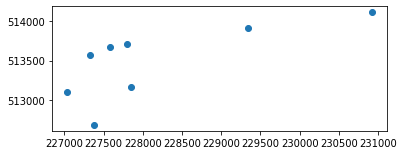

In [18]:
plaatsdata.plot()

In [30]:
aantalscholen = plaatsdata['soort_instelling'].count() 
aantalsoortschool = plaatsdata['soort_instelling'].nunique()
countdata = plaatsdata.groupby('soort_instelling').count()
countdata = countdata[['naam_vestiging']]
countdata = countdata.reset_index()


In [17]:
plaatsdata['soort_instelling'].unique()


array(['BO', 'VO'], dtype=object)

In [18]:

countdata

,soort_instelling,naam_vestiging
0,BO,6
1,VO,2


In [31]:
print('In', plaats,'zijn',aantalscholen, 'scholen gevestigd')
print('er zijn ', aantalsoortschool,'soorten scholen in ', plaats)

for index, row in countdata.iterrows():
    print('Aantal',row['soort_instelling'],'instellingen:',row['naam_vestiging'])

In DEDEMSVAART zijn 8 scholen gevestigd
er zijn  2 soorten scholen in  DEDEMSVAART
Aantal BO instellingen: 6
Aantal VO instellingen: 2


In [113]:
# ST_TONER = 'http://tile.stamen.com/toner/tileZ/tileX/tileY.png'
# ST_TONER_HYBRID = 'http://tile.stamen.com/toner-hybrid/tileZ/tileX/tileY.png'
# ST_TONER_LABELS = 'http://tile.stamen.com/toner-labels/tileZ/tileX/tileY.png'
# ST_TONER_LINES = 'http://tile.stamen.com/toner-lines/tileZ/tileX/tileY.png'
# ST_TONER_BACKGROUND = 'http://tile.stamen.com/toner-background/tileZ/tileX/tileY.png'
# ST_TONER_LITE = 'http://tile.stamen.com/toner-lite/tileZ/tileX/tileY.png'
# # 
# ST_TERRAIN = 'http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'
# ST_TERRAIN_LABELS = 'http://tile.stamen.com/terrain-labels/tileZ/tileX/tileY.png'
# ST_TERRAIN_LINES = 'http://tile.stamen.com/terrain-lines/tileZ/tileX/tileY.png'
# ST_TERRAIN_BACKGROUND = 'http://tile.stamen.com/terrain-background/tileZ/tileX/tileY.png'

# ST_WATERCOLOR = 'http://tile.stamen.com/watercolor/tileZ/tileX/tileY.png'
# OSM_A = 'http://a.tile.openstreetmap.org/tileZ/tileX/tileY.png'
# OSM_B = 'http://b.tile.openstreetmap.org/tileZ/tileX/tileY.png'
# OSM_C = 'http://c.tile.openstreetmap.org/tileZ/tileX/tileY.png'

In [143]:
# import matplotlib.pyplot as plt
# from matplotlib import cm
# import contextily as ctx
# cmap = plt.cm.get_cmap('Dark2', 9)
# ax = plaatsdata.plot(c=plaatsdata.naam_vestiging 	, cmap=cmap, label=plaatsdata.naam_vestiging, figsize=(10,10), alpha=.5)
# ctx.add_basemap(ax, source=ctx.sources.ST_TERRAIN)
# ax.set_axis_off()
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [20]:
#inladen gemeentegrensen uit pdok voor context plot
import geopandas as gpd
from requests import Request
from owslib.wfs import WebFeatureService
def wfs_kadaster(url,type_param):
 wfs = WebFeatureService(url=url)
 layer = list(wfs.contents)[-1]
 params = dict(service='WFS', request='GetFeature',typeName=type_param ,StartIndex='0', outputFormat='json')
 q = Request('GET', url, params=params).prepare().url
 return gpd.read_file(q)


In [21]:
#uitvoeren wfs query op kadaster
gdata = wfs_kadaster("https://geodata.nationaalgeoregister.nl/bestuurlijkegrenzen/wfs","bestuurlijkegrenzen:gemeenten")


In [22]:
#gdata

In [23]:
#selecteren grensen van een gemeente
gemeenteplotdata = gdata.loc[gdata['gemeentenaam'] == gemeente]

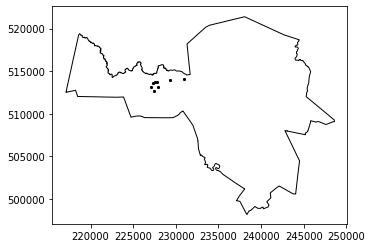

In [24]:
#plot de 2 lagen over elkaar
base = gemeenteplotdata.plot(color="white",edgecolor='black')
plaatsdata.plot(ax=base, marker='x', color='black', markersize=5);